In [77]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.graphics as sg
import sklearn


import matplotlib.pylab as plt

import seaborn as sns
sns.set_theme()

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('../data/nts.csv', index_col=0, parse_dates=True)
df.shape

(42, 15)

In [3]:
df.head()

,rynek,inflacja_r,inflacja_q,stopa_procentowa,liczba_kredytow,tempo_wzrostu,ufnosc,duze_zakupy,bezrobocie,spr_detaliczna,pkb,wynag,inflacja_q_kum,ogolem,rpk
2014-03-31,6193.211456,100.6,100.2,0.0446,41942.0,104.2,-20.5,-16.3,13.5,105.5,103.8,3882.041728,1.000000,11854.000000,0.0
2014-06-30,6227.984614,100.3,100.0,0.0447,45499.0,104.1,-16.8,-15.0,12.0,105.1,103.9,3922.805136,1.002000,10285.333333,0.0
2014-09-30,6357.260998,99.7,99.5,0.0443,43653.0,103.3,-16.9,-12.7,11.5,102.6,104.2,3948.311807,1.002000,11241.333333,0.0
2014-12-31,6438.874574,99.3,99.6,0.0388,42993.0,103.3,-13.8,-10.7,11.4,103.7,103.9,3986.074690,0.996990,14341.333333,0.0
2015-03-31,6473.616559,98.5,99.5,0.0348,42169.0,104.0,-14.9,-11.5,11.5,104.4,104.3,4028.086865,0.993002,10567.666667,0.0


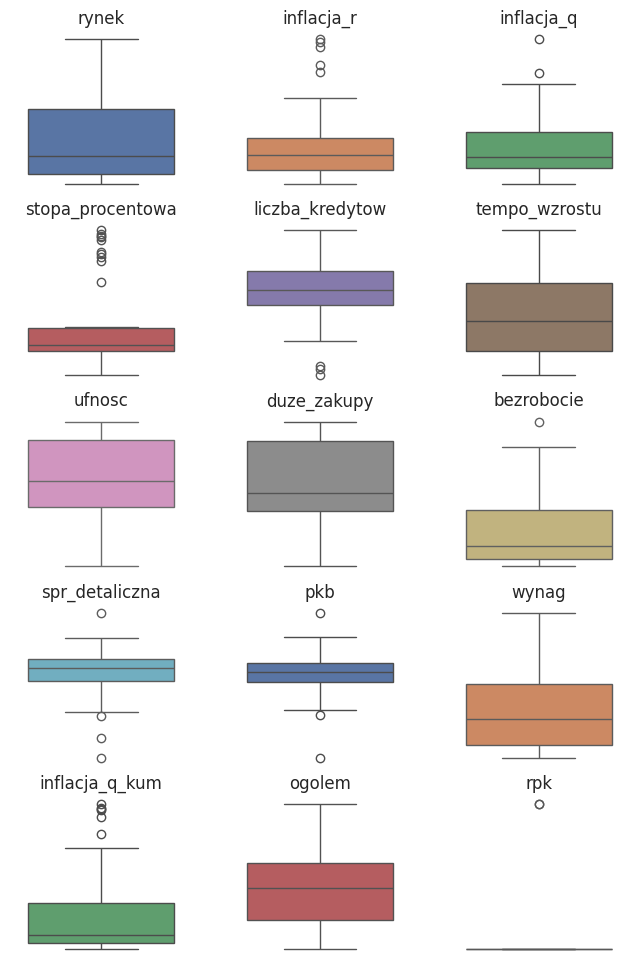

In [66]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(8,12))
for i, col in enumerate(df.columns):
    r, c = np.unravel_index(i, (5,3))
    axes[r,c].set_title(col)
    sns.boxplot(df[col], ax=axes[r,c], color=sns.color_palette(None, 15)[i])

for ax in axes.flatten():
    ax.set_axis_off()

fig.savefig("../images/vis_distr.png")

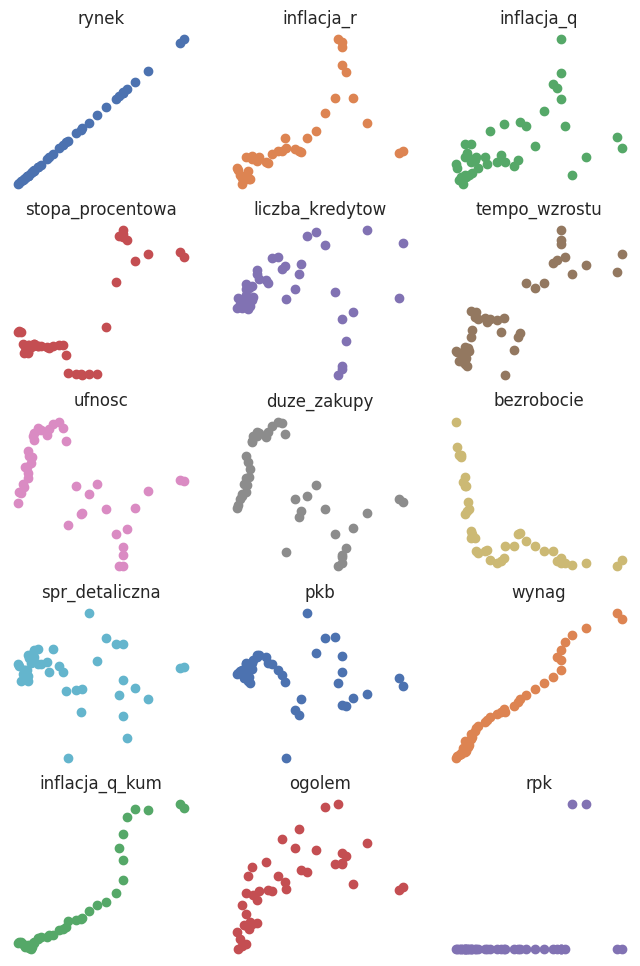

In [67]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(8,12))
for i, col in enumerate(df.columns):
    r, c = np.unravel_index(i, (5,3))
    axes[r,c].set_title(col)
    axes[r,c].scatter(df["rynek"], df[col], color=sns.color_palette(None, 15)[i])

for ax in axes.flatten():
    ax.set_axis_off()

fig.savefig("../images/rynek_kor.png")

In [75]:
corr = df.corr()
# corr.style.background_gradient(cmap='coolwarm').format(precision=3)
corr.style.set_table_styles(
    [dict(selector="th", props=[('width', '40px')]),
              dict(selector="th.col_heading",
                   props=[("writing-mode", "vertical-rl"),
                          ('transform', 'rotateZ(180deg)'), 
                          ('height', '120px'),
                          ('vertical-align', 'top')])]
).background_gradient(cmap='coolwarm').format(precision=2)


,rynek,inflacja_r,inflacja_q,stopa_procentowa,liczba_kredytow,tempo_wzrostu,ufnosc,duze_zakupy,bezrobocie,spr_detaliczna,pkb,wynag,inflacja_q_kum,ogolem,rpk
rynek,1.00,0.70,0.57,0.74,-0.02,0.85,-0.54,-0.56,-0.68,-0.22,-0.18,0.99,0.94,0.62,0.36
inflacja_r,0.70,1.00,0.81,0.77,-0.48,0.84,-0.71,-0.65,-0.58,-0.26,-0.10,0.73,0.70,0.65,0.19
inflacja_q,0.57,0.81,1.00,0.59,-0.29,0.74,-0.59,-0.50,-0.50,0.05,0.14,0.56,0.46,0.54,-0.14
stopa_procentowa,0.74,0.77,0.59,1.00,-0.51,0.81,-0.59,-0.60,-0.38,-0.20,-0.10,0.76,0.84,0.32,0.34
liczba_kredytow,-0.02,-0.48,-0.29,-0.51,1.00,-0.15,0.52,0.51,-0.13,0.38,0.30,-0.05,-0.19,0.04,0.13
tempo_wzrostu,0.85,0.84,0.74,0.81,-0.15,1.00,-0.48,-0.44,-0.69,0.03,0.16,0.87,0.82,0.59,0.26
ufnosc,-0.54,-0.71,-0.59,-0.59,0.52,-0.48,1.00,0.98,0.04,0.39,0.29,-0.50,-0.56,-0.35,-0.11
duze_zakupy,-0.56,-0.65,-0.50,-0.60,0.51,-0.44,0.98,1.00,0.01,0.45,0.38,-0.52,-0.60,-0.29,-0.18
bezrobocie,-0.68,-0.58,-0.50,-0.38,-0.13,-0.69,0.04,0.01,1.00,0.10,0.06,-0.73,-0.56,-0.71,-0.20
spr_detaliczna,-0.22,-0.26,0.05,-0.20,0.38,0.03,0.39,0.45,0.10,1.00,0.90,-0.26,-0.34,-0.15,-0.18


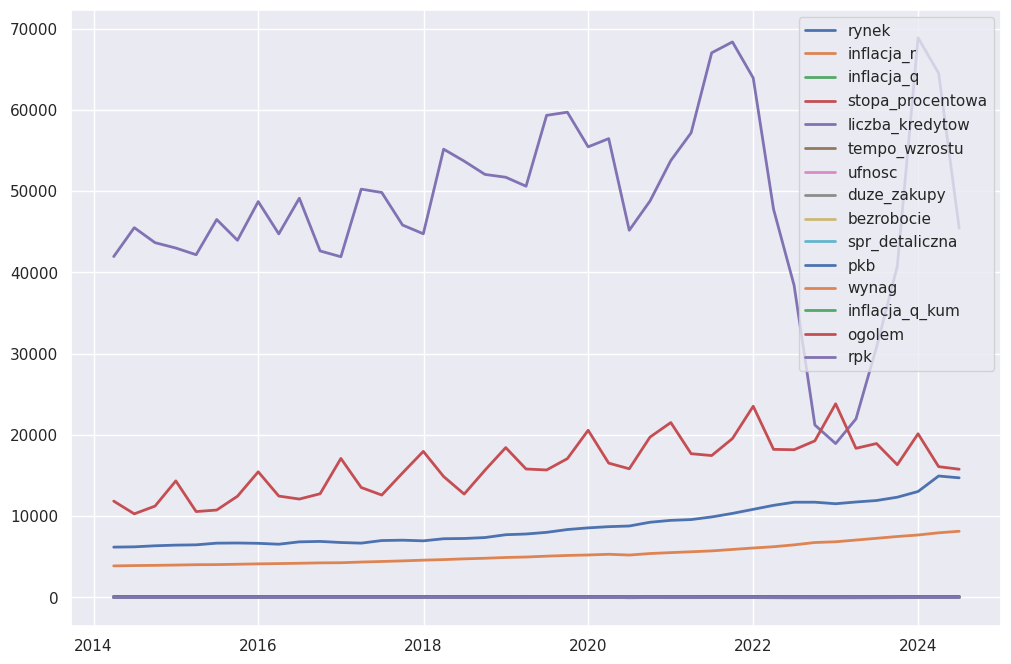

In [76]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
for col in df.columns:
    ax.plot(df[col], lw=2, label=col)
ax.legend()
fig.savefig("../images/all_columns.png")

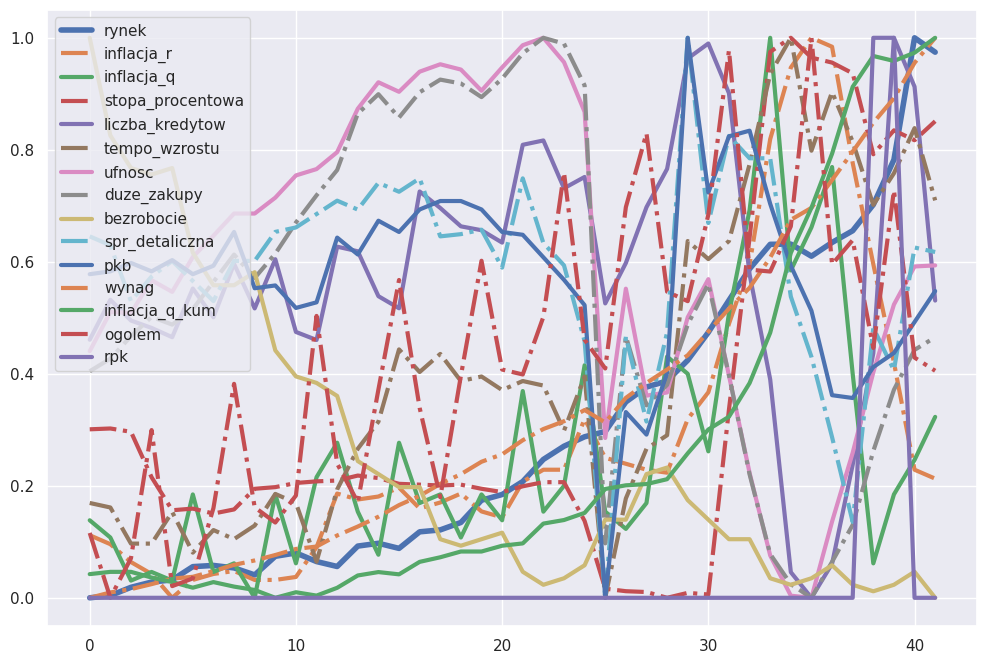

In [78]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
scaled_df = min_max_scaler.fit_transform(df)
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
for ind, col in enumerate(df.columns):
    ax.plot(scaled_df[:,ind] , lw=(4 if col == "rynek" else 3), ls=("-" if ind%2==0 else "-."), label=col)
ax.legend()
fig.savefig("../images/all_columns_scaled.png")

In [30]:
df.columns

Index(['rynek', 'inflacja_r', 'inflacja_q', 'stopa_procentowa',
       'liczba_kredytow', 'tempo_wzrostu', 'ufnosc', 'duze_zakupy',
       'bezrobocie', 'spr_detaliczna', 'pkb', 'wynag', 'inflacja_q_kum',
       'ogolem', 'rpk'],
      dtype='object')

In [102]:
ldf = df.drop(columns=['liczba_kredytow', 'spr_detaliczna'])

In [97]:
bn, fn = 35, 42
train, test = ldf.iloc[:bn], ldf.iloc[bn:fn]
X_train = train.drop('rynek', axis=1)
y_train = train['rynek']

X_test = test.drop('rynek', axis=1)
y_test = test['rynek']

In [104]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
print(f"Intercept: {lr_model.intercept_}")
coeff = lr_model.coef_
print(f"Coefficients: {coeff}")

preds = lr_model.predict(X_test)
test['rynek_Prediction'] = preds
preds

Intercept: -3070.3741428735966
Coefficients: [-5.20081974e+01  8.35695796e+01  3.67545372e+03 -1.04928839e+02
  5.89043360e+00 -1.52963234e+01  3.87060226e+01  4.68238393e+01
  2.24682185e+00  2.62874362e+03  6.95937270e-03  0.00000000e+00]


array([12447.26937935, 12799.39487284, 13520.69819246, 14148.04375407,
       14726.31570023, 15451.81027748, 16162.46750284])

In [105]:
ldf.columns

Index(['rynek', 'inflacja_r', 'inflacja_q', 'stopa_procentowa',
       'tempo_wzrostu', 'ufnosc', 'duze_zakupy', 'bezrobocie', 'pkb', 'wynag',
       'inflacja_q_kum', 'ogolem', 'rpk'],
      dtype='object')

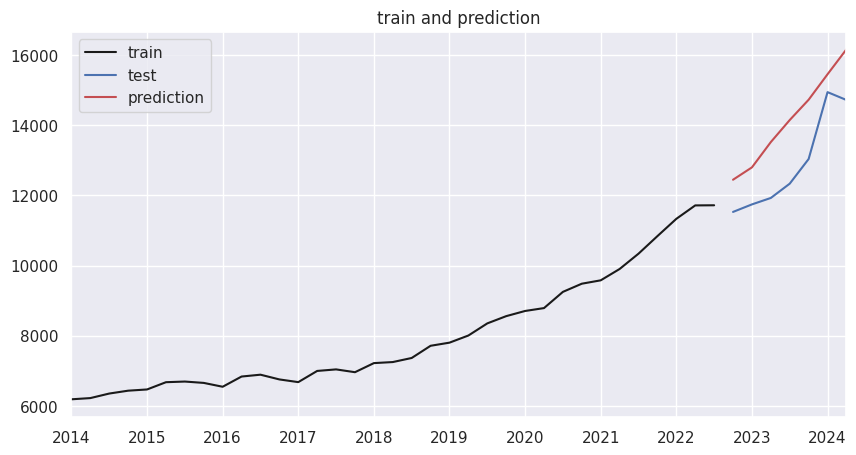

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=1)
train['rynek'].plot(style='k', figsize=(10,5), label = 'train', ax=axes)
test['rynek'].plot(style='b', figsize=(10,5), label = 'test', ax=axes)
test['rynek_Prediction'].plot(style='r', figsize=(10,5), label = 'prediction')
plt.title('train and prediction')
plt.legend()

In [111]:
model=sm.tsa.statespace.SARIMAX(df['rynek'].iloc[:-3], order=(1, 1, 1),seasonal_order=(1,1,1,4))
results=model.fit()

/home/volodya/code/ds/pkobp/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/home/volodya/code/ds/pkobp/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91798D+00    |proj g|=  1.16491D-01

At iterate    5    f=  5.89664D+00    |proj g|=  2.78566D-02

At iterate   10    f=  5.89517D+00    |proj g|=  4.64762D-03

At iterate   15    f=  5.89391D+00    |proj g|=  3.12267D-03

At iterate   20    f=  5.88606D+00    |proj g|=  3.27798D-02

At iterate   25    f=  5.85869D+00    |proj g|=  2.56233D-03

At iterate   30    f=  5.85777D+00    |proj g|=  5.03898D-03

At iterate   35    f=  5.85364D+00    |proj g|=  2.25286D-02

At iterate   40    f=  5.84578D+00    |proj g|=  1.50303D-03

At iterate   45    f=  5.84553D+00    |proj g|=  6.02443D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

In [113]:
results.predict(start=39,end=42,dynamic=True)

2023-12-31    12475.923437
2024-03-31    12605.964656
2024-06-30    12811.681259
2024-09-30    13055.521105
Freq: QE-DEC, Name: predicted_mean, dtype: float64

In [100]:
for c, col in zip(lr_model.coef_, ldf.columns):
    print(c, '\t', col)

-52.00819741866395 	 rynek
83.56957962600491 	 inflacja_r
3675.4537170365 	 inflacja_q
-104.92883852320084 	 stopa_procentowa
5.890433601866999 	 tempo_wzrostu
-15.29632344490321 	 ufnosc
38.70602256495631 	 duze_zakupy
46.82383928609446 	 bezrobocie
2.2468218493064533 	 pkb
2628.743623745433 	 wynag
0.006959372704471889 	 inflacja_q_kum
0.0 	 ogolem


In [43]:
bn, fn = 35, 42
train, test = df.iloc[:bn], df.iloc[bn:fn]
train.index, test.index, len(train), len(test)

X_train = train.drop('rynek', axis=1)
y_train = train['rynek']

X_test = test.drop('rynek', axis=1)
y_test = test['rynek']

In [44]:
X_train = sm.add_constant(X_train) # adding a constant
 
model_2 = sm.OLS(y_train, X_train).fit()
  
print_model = model_2.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                  rynek   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     264.7
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           3.11e-20
Time:                        05:52:54   Log-Likelihood:                -219.66
No. Observations:                  35   AIC:                             467.3
Df Residuals:                      21   BIC:                             489.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -159.5309   8472.040  

/home/volodya/code/ds/pkobp/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [45]:
model_2.rsquared_adj

0.990180069605904

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
bn, fn = 35, 42
train, test = df.iloc[:bn], df.iloc[bn:fn]
train.index, test.index, len(train), len(test)

X_train = train.drop('rynek', axis=1)
y_train = train['rynek']

X_test = test.drop('rynek', axis=1)
y_test = test['rynek']

In [63]:
rf_model = RandomForestRegressor(
    n_estimators = 200
    , max_depth = 6
    , random_state = 42
    )

# Fit the model 
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

/tmp/ipykernel_166239/4112200450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rynek_Prediction'] = preds


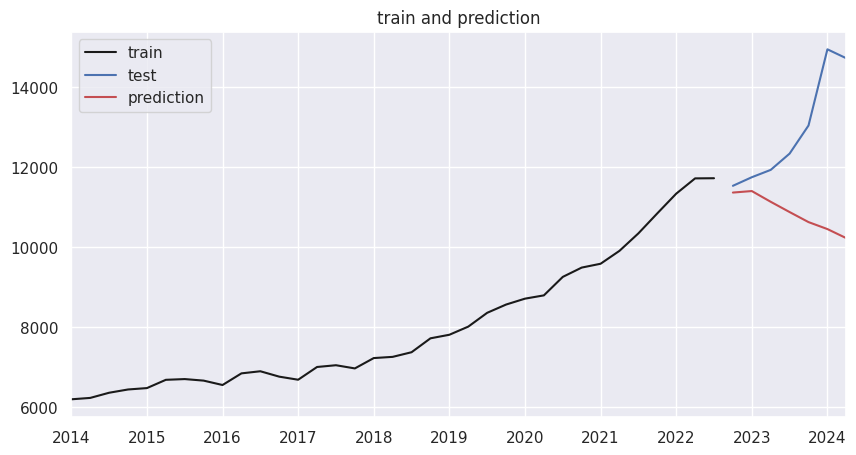

In [64]:
test['rynek_Prediction'] = preds
fig, axes = plt.subplots(nrows=1, ncols=1)
train['rynek'].plot(style='k', figsize=(10,5), label = 'train', ax=axes)
test['rynek'].plot(style='b', figsize=(10,5), label = 'test', ax=axes)
test['rynek_Prediction'].plot(style='r', figsize=(10,5), label = 'prediction')
plt.title('train and prediction')
plt.legend()

In [87]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog = df.drop(columns="rynek"))
model_fit = model.fit(2)


/home/volodya/code/ds/pkobp/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


In [ ]:

# make prediction on validation
prediction = model_fit.forecast(model_fit.rynek, steps=7)